# Show sentinel 1 test image
This notebook is an example of how to load and plot a Sentinel 1 SLC image. 

In [1]:
using SARProcessing;

## Load sentinel 1 Image

In [3]:
slcSubsetPath = "../test/testData/s1a-iw3-slc-vv_subset_hight9800_10400_width11000_11000.tiff";
complex_image = SARProcessing.load_tiff(slcSubsetPath)
# The ration of pixel size is around 1:4 in Sentinel SLC. 
# Selecting every fouth pixel in the across track directions gives more natural aspect ratios
complex_image = complex_image[:,1:4:end] 

601×351 Matrix{ComplexF64}:
 -27.0-5.0im    -6.0+2.0im     -9.0+2.0im   …   83.0-49.0im      6.0-38.0im
 -40.0-25.0im  -34.0-81.0im   -48.0+29.0im     -91.0-72.0im    -90.0-57.0im
 -29.0+76.0im  -86.0+44.0im    41.0+86.0im      20.0+126.0im   -94.0+102.0im
   0.0+5.0im    16.0+52.0im     8.0-24.0im      23.0-28.0im    131.0+87.0im
  -7.0+24.0im  110.0+1.0im      7.0-13.0im      -5.0+70.0im     38.0-125.0im
 -61.0-1.0im    60.0-133.0im  -67.0-69.0im  …   13.0-18.0im     -6.0+3.0im
  -8.0+58.0im    0.0-122.0im  -57.0-12.0im     -95.0+7.0im       5.0-81.0im
  -7.0-1.0im   -86.0-93.0im   -47.0-58.0im     -45.0+102.0im   -64.0+37.0im
   3.0-14.0im  -40.0+17.0im   -62.0-52.0im      10.0-17.0im    103.0+72.0im
 -30.0+3.0im   -25.0+9.0im    -42.0+4.0im      -82.0+52.0im     96.0-140.0im
  38.0-11.0im    4.0+48.0im    62.0+1.0im   …   83.0+64.0im   -122.0-36.0im
 -33.0+7.0im    -6.0+54.0im    53.0-58.0im     100.0-10.0im     47.0+72.0im
  58.0+63.0im   78.0+67.0im     1.0-17.0im      79.0-70.0i

## Show image
The test image shows Angra do Heroísmo on the Azores. Note that east west is mirrored in the sentinel image

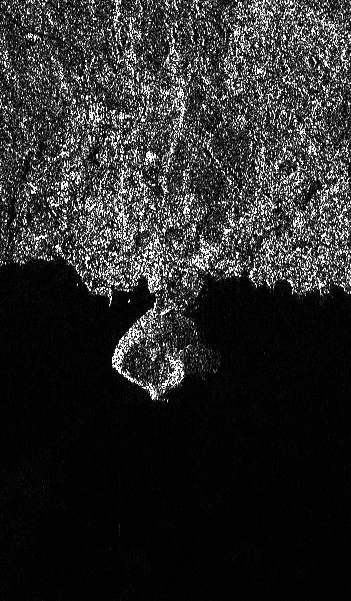

In [4]:
img = SARProcessing.sar2grayimage(complex_image, p_quantile = 0.95)